<a href="https://colab.research.google.com/github/TimurMMD/ML_projects/blob/main/Regression_of_used_car_prices_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression for Used Cars Prices Prediction**

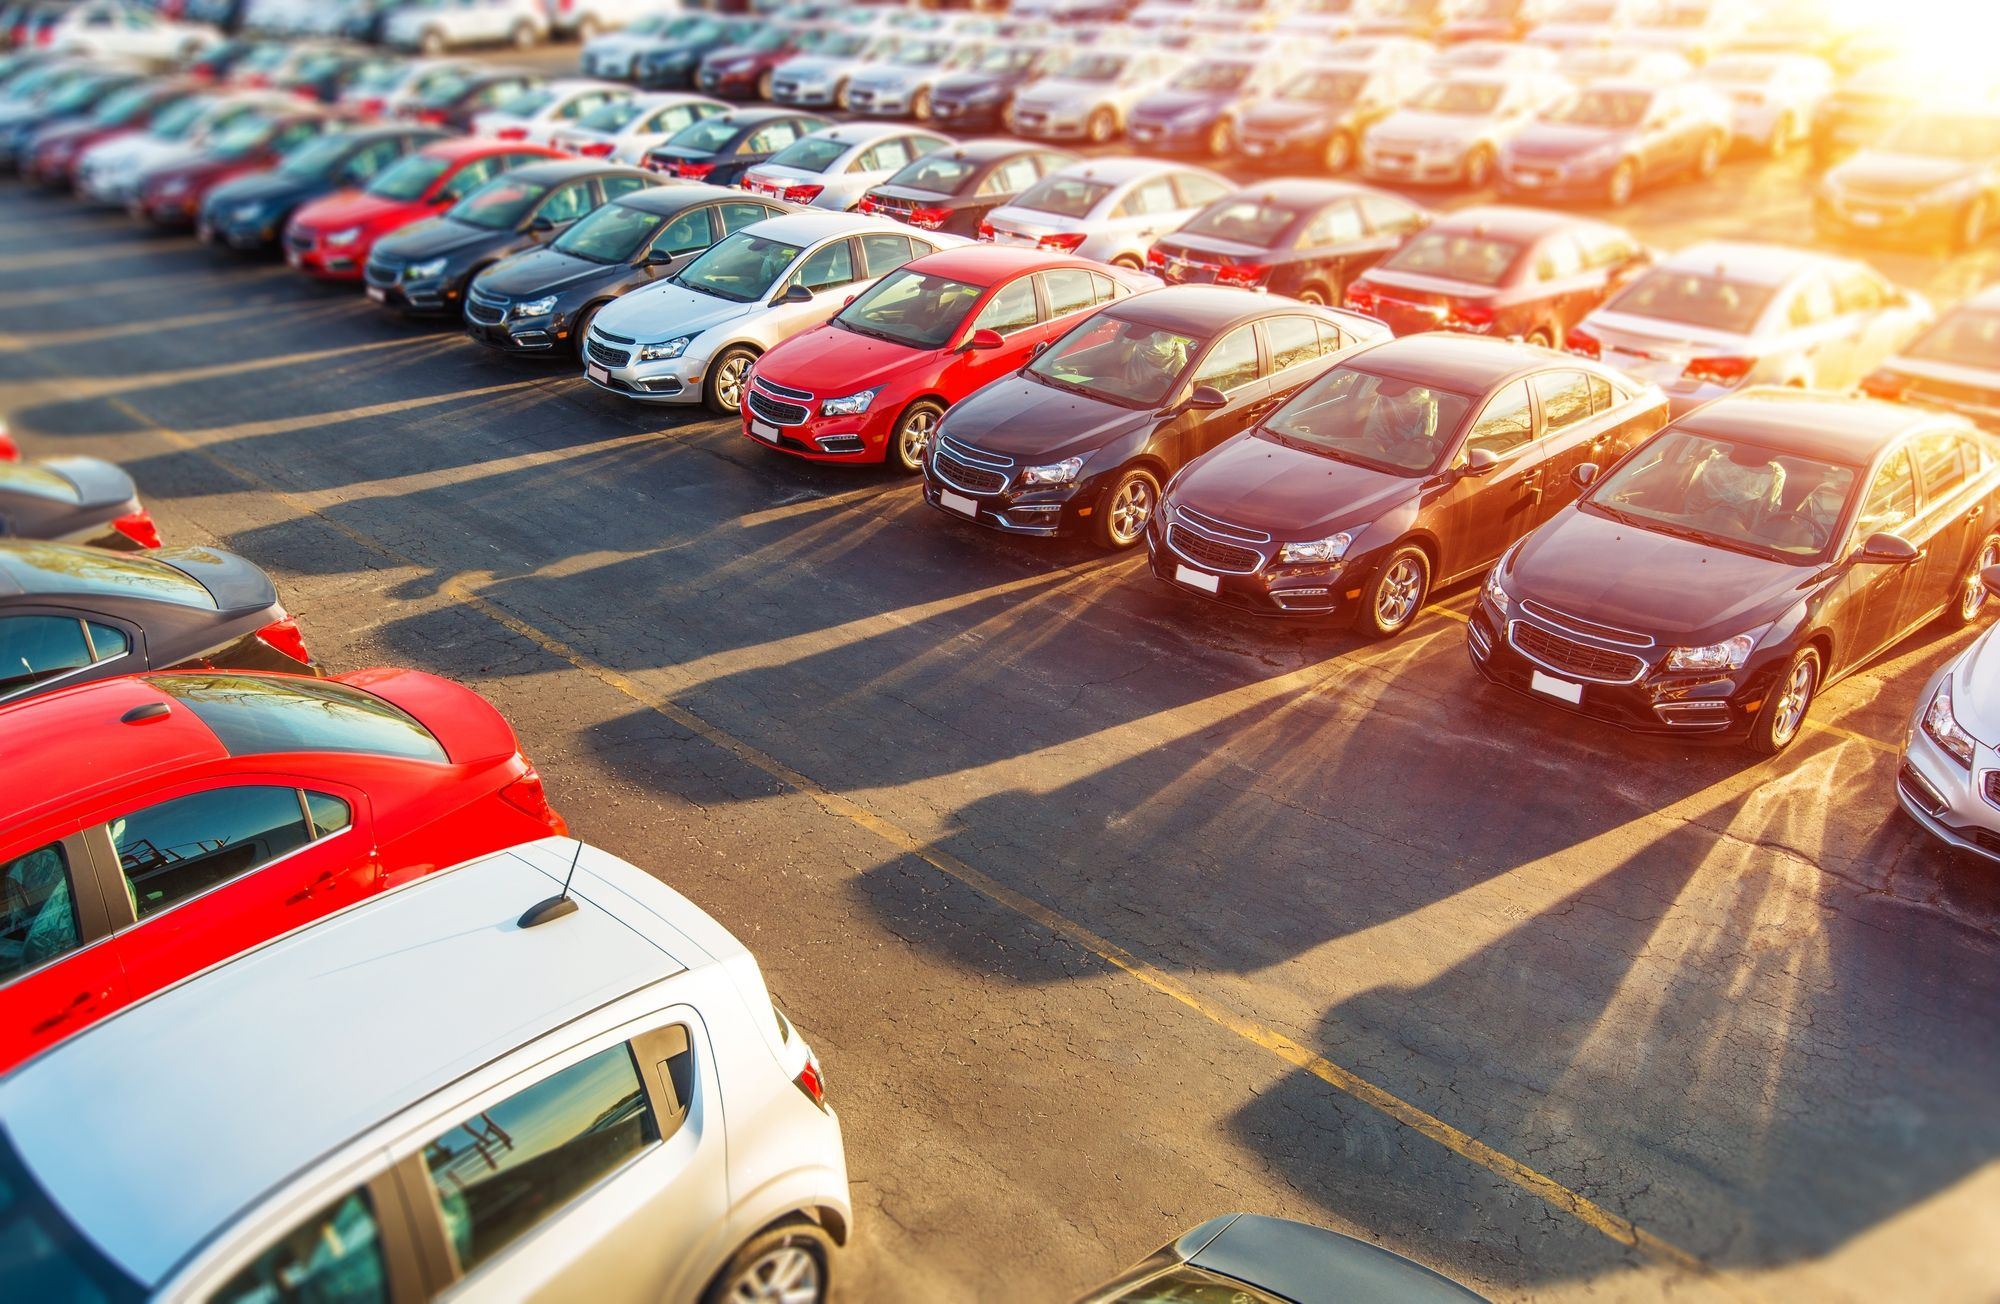

## **Introduction**

The automotive market for used cars is vast and highly dynamic, with prices influenced by various factors such as brand, model, year of manufacture, mileage, and additional features. Accurate price predictions can benefit both sellers and buyers, providing transparency in pricing and aiding in better decision-making.

This project leverages machine learning techniques to build a regression model capable of predicting used car prices. By analyzing historical data and extracting meaningful patterns, the model will provide insights into the key factors driving price variations. The ultimate goal is to create a robust model that not only achieves high accuracy but also offers interpretability, enabling end-users to understand the reasons behind the predictions.

---

## **Project Objectives**
- Explore and preprocess a dataset containing details about used cars.
- Analyze relationships between features and identify key factors affecting car prices.
- Build, evaluate, and compare regression models to predict car prices.
- Interpret the model’s predictions and draw actionable insights for potential users.

---

## **Methodology**

This project follows the **CRISP-DM (Cross-Industry Standard Process for Data Mining)** methodology, which provides a structured and iterative framework for data science projects. The process involves:

1. **Business Understanding:** Understanding the problem, defining the objective, and framing the problem statement.
2. **Data Understanding:** Exploring the dataset to uncover key patterns and relationships.
3. **Data Preparation:** Cleaning and preprocessing data for model development.
4. **Modeling:** Training various regression models and comparing their performance.
5. **Evaluation:** Analyzing model outputs to ensure they meet business and technical objectives.
6. **Deployment:** Providing actionable insights and preparing the model for practical application.

---

## **Technologies Used**

This project is implemented using the Python programming language and a suite of data science libraries, including:

- **Pandas** and **NumPy** for data manipulation and preprocessing.
- **Matplotlib** and **Seaborn** for visualization.
- **Scikit-learn**, **XGBoost**, and other libraries for building and evaluating regression models.

---

By the end of this project, we aim to deliver a well-documented regression analysis that not only achieves high accuracy in price predictions but also enhances understanding of the factors influencing used car prices.

Let’s begin our journey into data-driven decision-making for the automotive market! 🚗📊


# Step 1: Business Understanding
# In this project, our objective is to build a regression model to predict the prices of used cars.
# Accurate price predictions can help both sellers and buyers make informed decisions.
# We aim to answer the following questions:
# - What are the main factors influencing car prices?
# - How can we leverage machine learning to predict these prices accurately?

# Following the CRISP-DM methodology, we will:
# 1. Define the problem and set our goals.
# 2. Explore and preprocess the dataset.
# 3. Train regression models and evaluate their performance.
# 4. Provide actionable insights and recommendations.


In [1]:
!pip install dython
!pip install pytorch_tabnet

In [2]:
!pip install scikit-learn==1.3.0

In [4]:
# Instantiate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from dython.nominal import associations
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import  make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from pytorch_tabnet.tab_model import TabNetRegressor
from scipy.stats import uniform, randint

# Step 2: Data Understanding
# This step involves loading and exploring the dataset to gain insights into its structure and contents.
# We will:
# - Load the dataset from a source ([Kaggle](https://www.kaggle.com/competitions/playground-series-s4e9/data)).
# - Display the dataset's first few rows to understand its features and target variable.
# - Check for null values and data types to identify preprocessing needs.
# - Perform exploratory data analysis (EDA) to visualize patterns, correlations, and distributions.
# - Check statistics, distributions
# Let's begin by loading the dataset and summarizing its structure.


In [5]:
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/Hackathon_data/regression_car_price.zip


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/Hackathon_data/regression_car_price.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [6]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
ss = pd.read_csv('/content/sample_submission.csv')

In [5]:
# Check the first 5 rows to understand what we're dealing with
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [6]:
# Let's start to explore the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [7]:
train.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


In [8]:
print(test.info())
print(test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB
None
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident   

In [9]:
# Statistics of training set
train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [10]:
# Let's calculate the proportion of the missing values
train_miss = train.isna().mean() * 100
test_miss = test.isna().mean() * 100

print("Proportion of the missing values in the training set: ")
print(train_miss[train_miss > 0])
print("\nProportion of the missing values in the test set: ")
print(test_miss[test_miss > 0])

Proportion of the missing values in the training set: 
fuel_type       2.696080
accident        1.300568
clean_title    11.360876
dtype: float64

Proportion of the missing values in the test set: 
fuel_type       2.691543
accident        1.298433
clean_title    11.328666
dtype: float64


In [11]:
categorical_columns = train.select_dtypes(include=['object']).columns
unique_values = {col: train[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
  print(f"{col}: {unique_count} unique values")

brand: 57 unique values
model: 1897 unique values
fuel_type: 7 unique values
engine: 1117 unique values
transmission: 52 unique values
ext_col: 319 unique values
int_col: 156 unique values
accident: 2 unique values
clean_title: 1 unique values


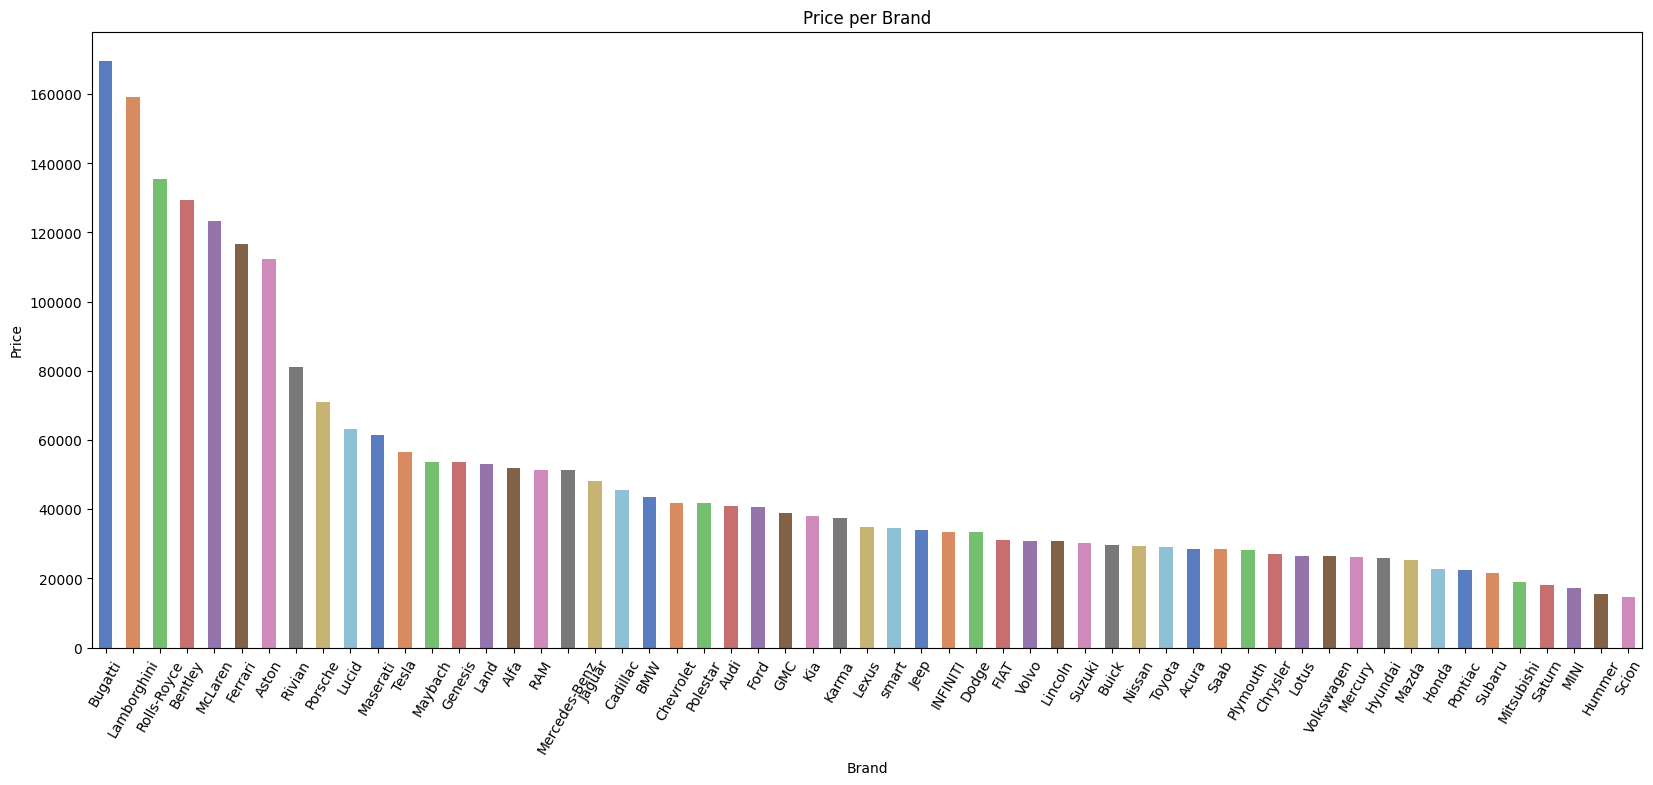

In [12]:
# Make a barplot of the price per each car brand
order = train.groupby('brand')['price'].mean().sort_values(ascending=False).index
plt.figure(figsize=(20, 8))
sns.barplot(x='brand', y='price', data=train, order=order, errorbar=None, palette = 'muted', width=0.5)
plt.title("Price per Brand")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=60)
plt.show()

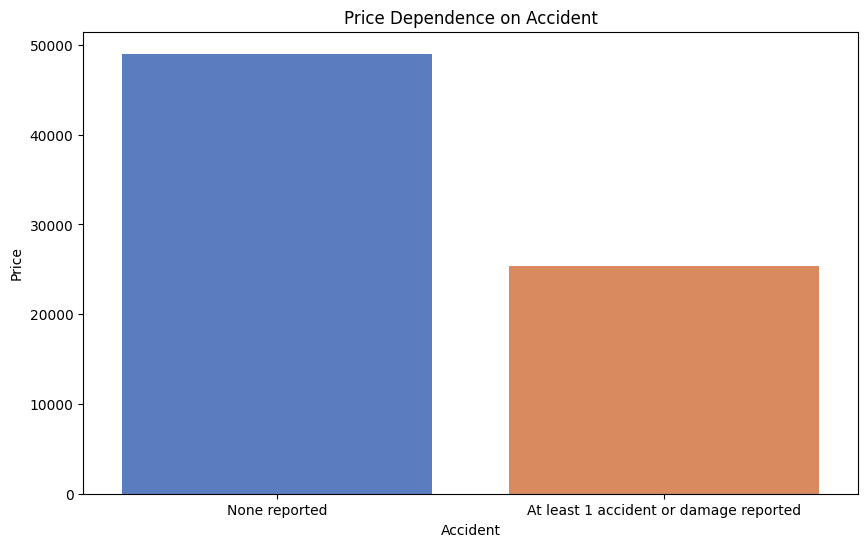

In [13]:
# Make a barplot price dependence on the accident
plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=train, errorbar=None, palette='muted')
plt.title("Price Dependence on Accident")
plt.xlabel("Accident")
plt.ylabel("Price")
plt.show()

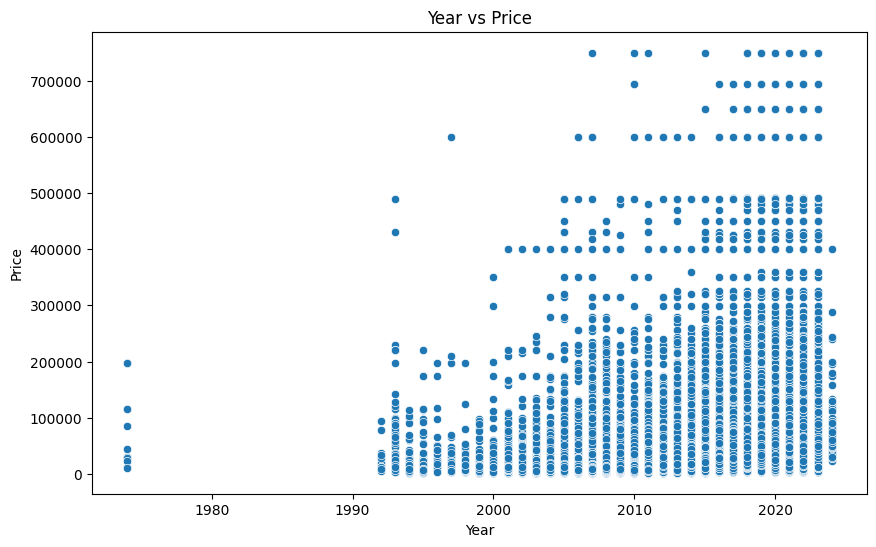

In [14]:
# Let's checkt the correlation of the year and the price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='price', data=train[train['price'].astype(float) < 1000000])
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

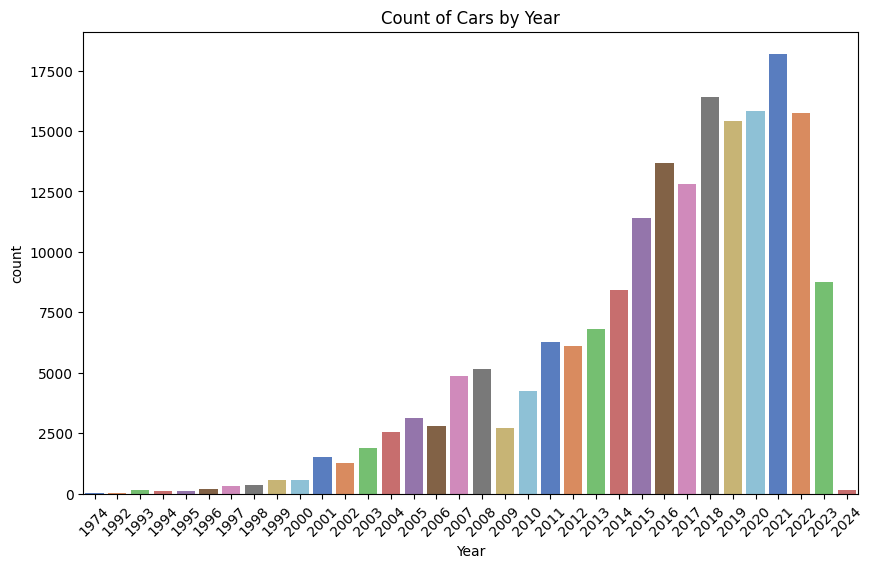

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='model_year', palette='muted')
plt.title("Count of Cars by Year")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

## After the analysis the following conclusions can be made:


*   The clean_title column is unnecessary due to the high proportion of missing values and having only one unique value.
*   We can see that for year distribution we have a right-skewed normal distribution
*   And the price is correlated with the year of the car
*   The car with "No accident reported" costs 2 times higher which is also quite logical
* A fuel type and accident columns are only ones that contains missing values, the proportion of which less than 3%, so it can be simply removed from the dataset
* The price is highly dependable on the brand





# Step 3: Data Preparation
# Data preparation is a critical step in building a successful machine learning model.
# We will clean and preprocess the dataset to ensure it is ready for regression modeling.
# The steps include:
# - Handling missing values: Impute or remove null entries.
# - Encoding categorical variables: Convert strings into numerical representations.
# - Scaling numerical features: Normalize or standardize features for consistent scaling.
# - Feature engineering: Create new features from existing data, such as age of the car or mileage per year.
#
# Let's clean and preprocess our dataset.


In [16]:
print("Training shape before the imputing: ", train.shape)
print("Testing shape before the imputing: ", test.shape)
print("Submission shape: ", ss.shape)

Training shape before the imputing:  (188533, 13)
Testing shape before the imputing:  (125690, 12)
Submission shape:  (125690, 2)


In [7]:
# For the submission needs to be all the rows in the dataset, so the missing values should be filled
# Start with the dropping columns
train_1 = train.drop(['id', 'clean_title'], axis=1)
test_1 = test.drop(['id', 'clean_title'], axis=1)

def knn_impute(df, n_neighbors=10):
  df_copy = df.copy()
  for col in df_copy.select_dtypes(include='object').columns:
    df_copy[col] = df_copy[col].astype('category').cat.codes
  knn_imputer = KNNImputer(n_neighbors=n_neighbors)
  df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_copy), columns=df_copy.columns)
  for col in df.select_dtypes(include='object').columns:
    df_imputed[col] = df_imputed[col].round().astype(float).map(dict(enumerate(df[col].astype('category').cat.categories)))
  return df_imputed

In [8]:
train_imputed = knn_impute(train_1, n_neighbors=10)
test_imputed = knn_impute(test_1, n_neighbors=10)

In [9]:
cat_cols_train = train_imputed.select_dtypes(include='object').columns
cat_cols_train = cat_cols_train[cat_cols_train != 'price']

train_imputed[cat_cols_train] = train_imputed[cat_cols_train].fillna('missing')
test_imputed[cat_cols_train] = test_imputed[cat_cols_train].fillna('missing')

ordinal_encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=-1)

train_imputed[cat_cols_train] = ordinal_encoder.fit_transform(train_imputed[cat_cols_train].astype(str))
test_imputed[cat_cols_train] = ordinal_encoder.transform(test_imputed[cat_cols_train].astype(str))

In [20]:
train_imputed.isna().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [21]:
print("Training shape before the imputing: ", train.shape)
print("Testing shape before the imputing: ", test.shape)
print("*************************************************")
print("Training shape after the imputing: ", train_imputed.shape)
print("Testing shape after the imputing: ", test_imputed.shape)

Training shape before the imputing:  (188533, 13)
Testing shape before the imputing:  (125690, 12)
*************************************************
Training shape after the imputing:  (188533, 11)
Testing shape after the imputing:  (125690, 10)


In [22]:
train_imputed.describe()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
count,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,23.161500,867.250566,2015.829998,65705.295174,2.073048,612.825489,29.668827,157.330478,34.996696,0.792530,4.387802e+04
std,15.868168,521.804717,5.660967,49798.158076,0.708538,278.163140,13.007453,114.585328,39.856868,0.436393,7.881952e+04
min,0.000000,0.000000,1974.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+03
25%,9.000000,431.000000,2013.000000,24115.000000,2.000000,385.000000,20.000000,29.000000,14.000000,1.000000,1.700000e+04
50%,21.000000,817.000000,2017.000000,57785.000000,2.000000,627.000000,32.000000,128.000000,14.000000,1.000000,3.082500e+04
75%,36.000000,1320.000000,2020.000000,95400.000000,2.000000,853.000000,38.000000,281.000000,56.000000,1.000000,4.990000e+04
max,56.000000,1896.000000,2024.000000,405000.000000,7.000000,1116.000000,51.000000,318.000000,155.000000,2.000000,2.954083e+06


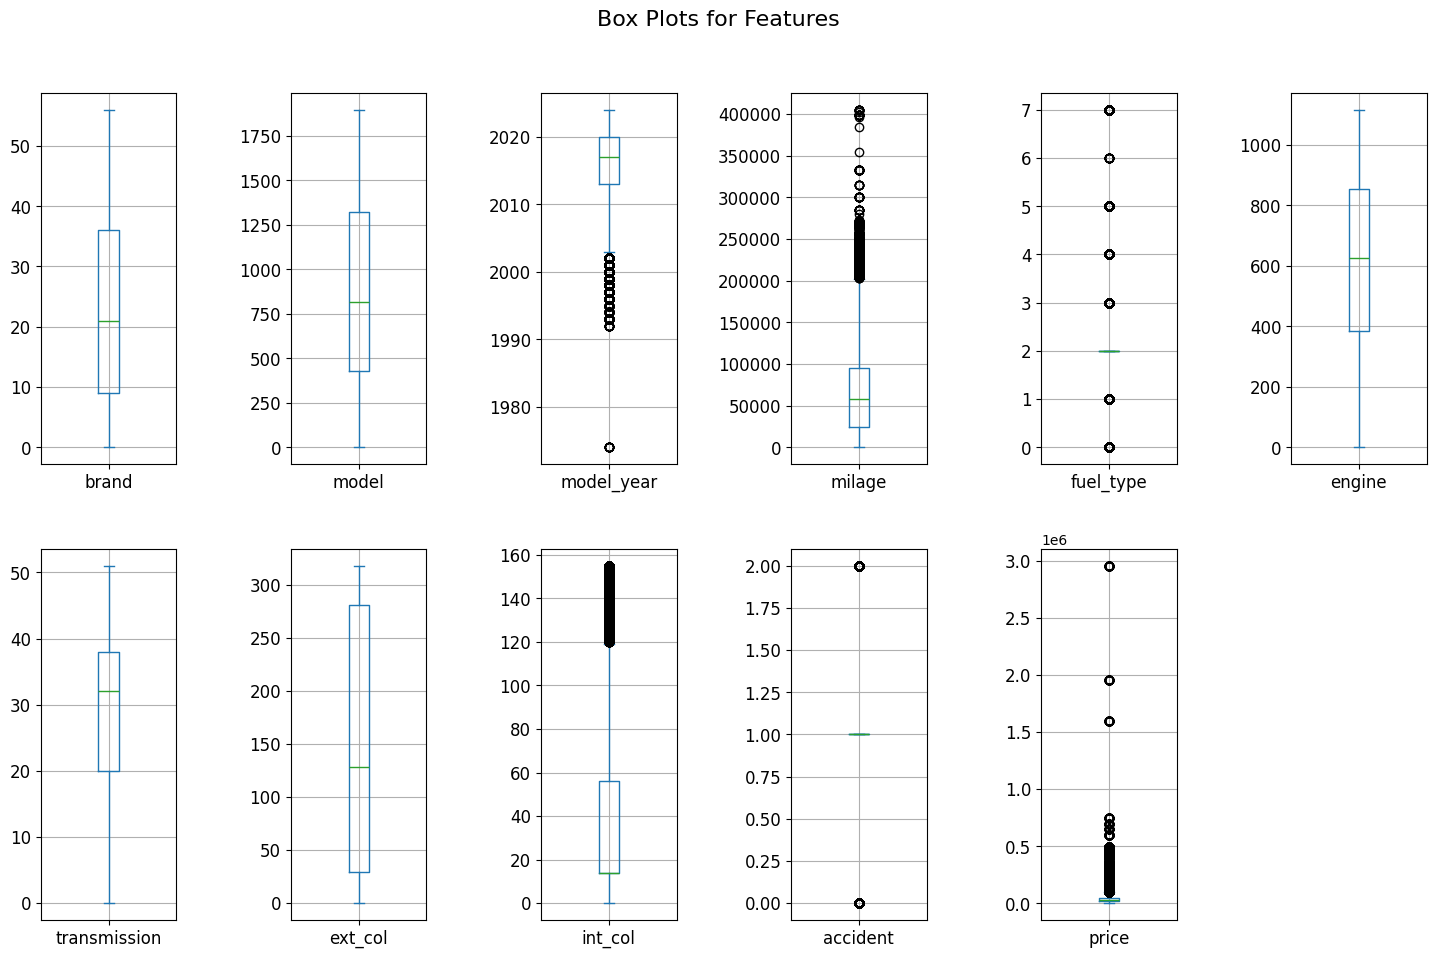

In [23]:
def plot_boxplots(df, figsize=(15, 10)):
    # Create subplots for each feature
    df.plot(kind='box', subplots=True, layout=(2, int(len(df.columns) / 2) + 1),
            figsize=figsize, sharex=False, sharey=False, grid=True, fontsize=12)
    plt.suptitle("Box Plots for Features", fontsize=16)
    plt.tight_layout(pad=3)
    plt.show()

# Plot box plots for all features
plot_boxplots(train_imputed)

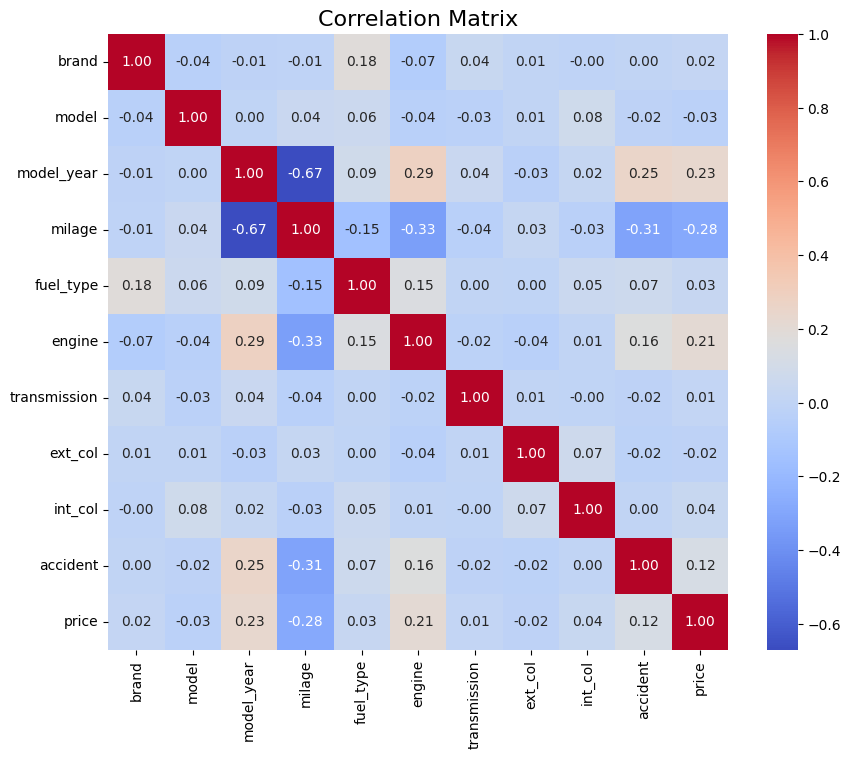

In [24]:
# Calculate correlation matrix
correlation_matrix = train_imputed.corr()

# Visualize correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [10]:
# Remove outliers using Interquartile range

def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

train_no_outliers = remove_outliers(train_imputed, 'milage')
train_no_outliers = remove_outliers(train_imputed, 'price')
train_no_outliers = remove_outliers(train_imputed, 'model_year')
train_no_outliers = remove_outliers(train_imputed, 'int_col')
train_no_outliers.reset_index(drop=True, inplace=True)


<Figure size 1200x800 with 0 Axes>

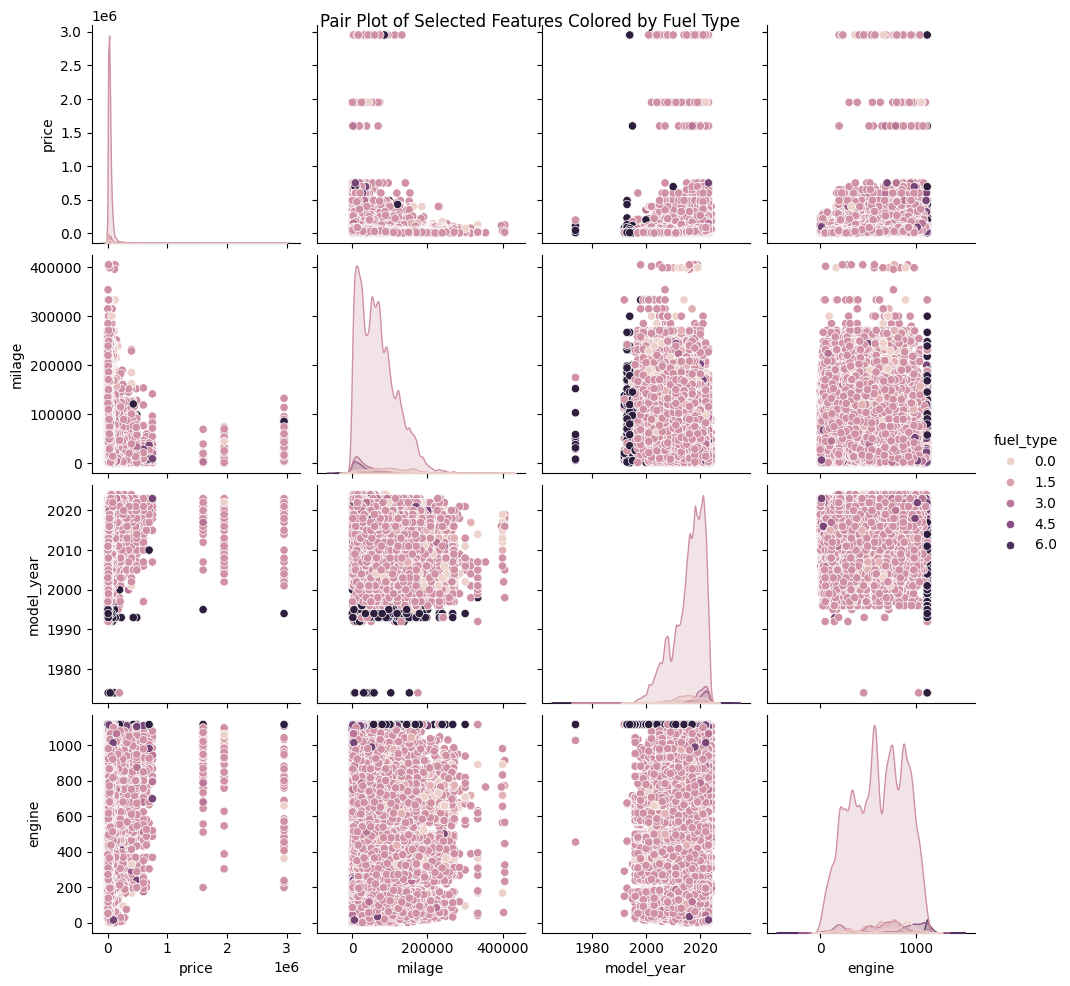

In [26]:
plt.figure(figsize=(12, 8))

sns.pairplot(train_no_outliers[['price', 'milage', 'model_year', 'engine', 'fuel_type']], hue='fuel_type')
plt.suptitle("Pair Plot of Selected Features Colored by Fuel Type")
plt.show()


In [11]:
X = train_no_outliers.drop('price', axis=1)
y = train_no_outliers['price']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_imputed)

# Step 4: Modeling
# In this step, we will build and evaluate regression models for predicting car prices.
# The steps include:
# - Splitting training dataset to train and test models
# - Training multiple models, such as Linear Regression, Random Forest, and XGBoost.
# - Evaluating models using metrics like R² score, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
#
# Our goal is to identify the model that performs best on our dataset.
# Let's start training our models.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# Linear Models
lr = LinearRegression()  # Simple linear regression, assumes a linear relationship.
lasso = Lasso()  # Linear regression with L1 regularization, good for feature selection.
elasticnet = ElasticNet()  # Combines L1 (Lasso) and L2 (Ridge) regularization.

# Tree-Based Models
cart = DecisionTreeRegressor()  # Single decision tree, prone to overfitting without pruning.

# Neighbor-Based and Kernel Models
knn = KNeighborsRegressor()  # Predicts by averaging the target values of k-nearest neighbors.
svr = SVR()  # Support Vector Regressor, fits data using kernels and a margin of tolerance.

# Bagging Ensemble Models
rfr = RandomForestRegressor()  # Bagging ensemble of decision trees, reduces overfitting.
etr = ExtraTreesRegressor()  # Variation of Random Forest with random feature splits.

# Boosting Ensemble Models
abr = AdaBoostRegressor()  # Boosting ensemble, combines weak learners iteratively.
gbr = GradientBoostingRegressor()  # Boosting using gradient descent, optimizes a loss function.
xgb = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
# Gradient boosting with XGBoost, optimized for speed and performance.
lgbm = LGBMRegressor(metric='rmse', random_state=42)
# Gradient boosting with LightGBM, optimized for tabular data.

# Deep Learning Model
tabnet = TabNetRegressor(verbose=0)  # TabNet, a deep learning model designed for tabular data.


In [34]:
# Prepare the list of models
models = [
    ('LR', lr),
    ('LASSO', lasso),
    ('EN', elasticnet),
    ('KNN', knn),
    ('CART', cart),
    ('ABR', abr),
    ('GBR', gbr),
    ('RFR', rfr),
    ('ETR', etr)
]

# Initialize results containers
names = []
kfold_results = []
test_results = []
train_results = []

# Define K-Fold parameters
num_folds = 5
seed = 42

# Loop through models
for name, model in models:
    names.append(name)

    # K-Fold Cross-Validation
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = -1 * cross_val_score(model, X_scaled, y, cv=kfold, scoring='neg_root_mean_squared_error')
    kfold_results.append(cv_results)

    # Train the model on the full training set
    res = model.fit(X_train, y_train)
    train_result = root_mean_squared_error(y_train, res.predict(X_train))  # RMSE for training
    train_results.append(train_result)

    # Evaluate on the test set
    test_result = root_mean_squared_error(res.predict(X_test), y_test)  # RMSE for testing
    test_results.append(test_result)

    # Display results
    msg = f"{name}: CV Mean RMSE: {cv_results.mean():.4f}, CV Std: {cv_results.std():.4f}, Train RMSE: {train_result:.4f}, Test RMSE: {test_result:.4f}"
    print(msg)

LR: CV Mean RMSE: 73484.9104, CV Std: 6029.1312, Train RMSE: 74941.5253, Test RMSE: 68653.0750
LASSO: CV Mean RMSE: 73484.9109, CV Std: 6029.1249, Train RMSE: 74941.5253, Test RMSE: 68653.1010
EN: CV Mean RMSE: 73705.6825, CV Std: 6036.2327, Train RMSE: 75161.0068, Test RMSE: 68903.0778
KNN: CV Mean RMSE: 77989.0862, CV Std: 5278.8185, Train RMSE: 65200.0311, Test RMSE: 74004.8476
CART: CV Mean RMSE: 110575.8461, CV Std: 4811.5545, Train RMSE: 1069.5879, Test RMSE: 114423.6570
ABR: CV Mean RMSE: 102966.4935, CV Std: 29385.4303, Train RMSE: 74438.6276, Test RMSE: 68132.1536
GBR: CV Mean RMSE: 71740.8989, CV Std: 6084.7018, Train RMSE: 72497.3922, Test RMSE: 66642.9826
RFR: CV Mean RMSE: 77156.2610, CV Std: 5047.2536, Train RMSE: 29503.5861, Test RMSE: 73245.6594
ETR: CV Mean RMSE: 78431.8492, CV Std: 4787.1302, Train RMSE: 1069.6525, Test RMSE: 76387.7497


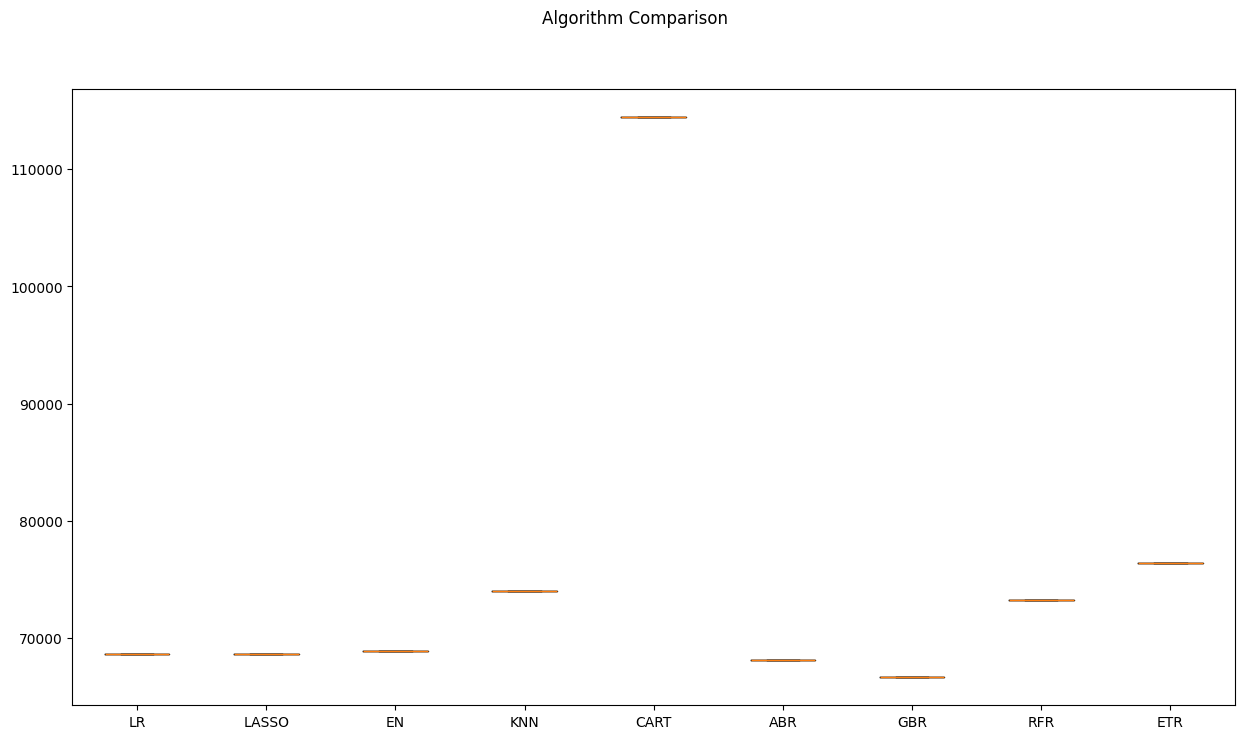

In [37]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)

# Reshape test_results to have one boxplot per model
test_results_reshaped = [[result] for result in test_results]  # Reshape to a list of lists

plt.boxplot(test_results_reshaped)  # Plot the reshaped data

ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

In [38]:
test_results_reshaped

[[68653.07499349894],
 [68653.10101516369],
 [68903.07781555761],
 [74004.8475892483],
 [114423.6569846368],
 [68132.15355953964],
 [66642.98257284368],
 [73245.65940358504],
 [76387.74967311352]]

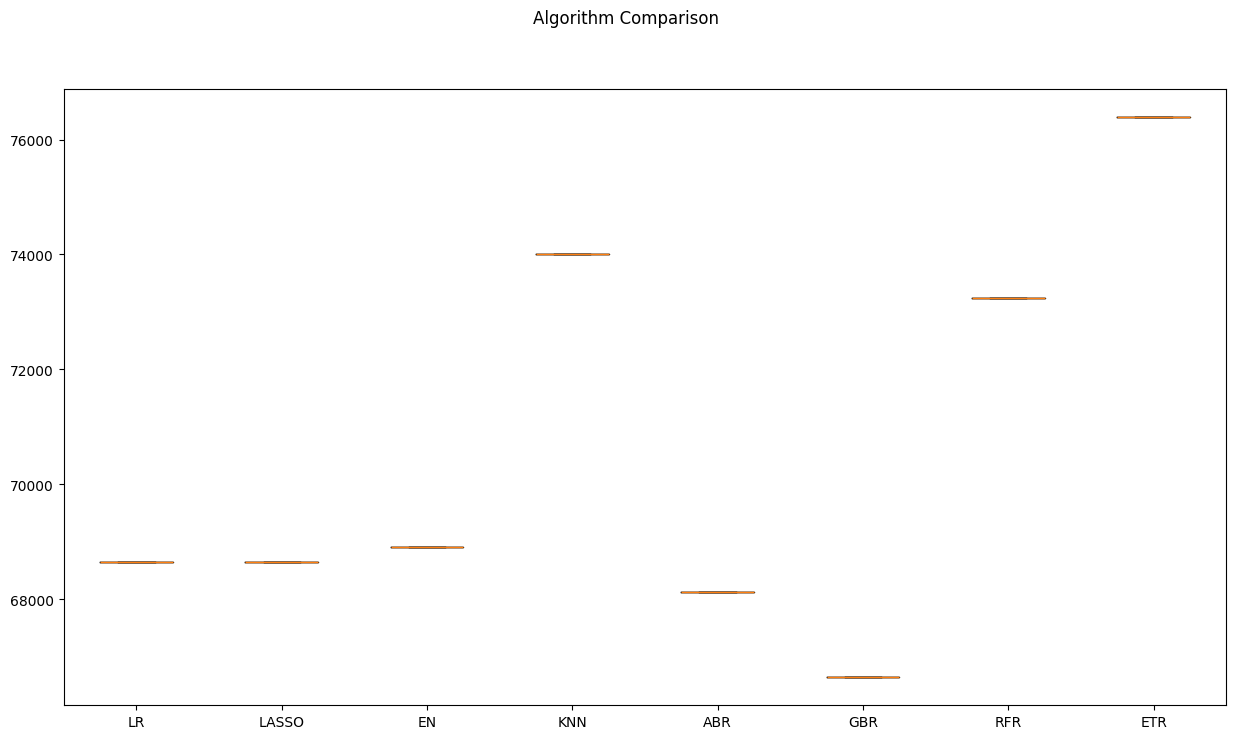

In [40]:
results_with_no_cart = [sublist for sublist in test_results_reshaped if all(value <= 100000 for value in sublist)]
names_no_cart = [sublist for sublist in names if 'CART' not in sublist]


fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_with_no_cart)  # Plot the reshaped data
ax.set_xticklabels(names_no_cart)
fig.set_size_inches(15,8)
plt.show()

In [14]:
# Define parameter distributions for both models
xgb_param_dist = {
    'n_estimators': randint(100, 1001),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.8, 0.2)
}

lgbm_param_dist = {
    'n_estimators': randint(100, 1001),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.8, 0.2),
    'reg_alpha': uniform(0.0, 10.0),
    'reg_lambda': uniform(0.0, 10.0)
}


# Define RMSE as the scoring metric
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [17]:
# Perform random search for XGBoost
print("Tuning XGBoost...")
xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_dist,
                                       scoring=rmse_scorer, cv=5, n_iter=50, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)
best_xgb_model = xgb_random_search.best_estimator_

print(f"Best XGBoost parameters: {xgb_random_search.best_params_}")
print(f"Best XGBoost RMSE: {abs(xgb_random_search.best_score_):.4f}")

Tuning XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost parameters: {'colsample_bytree': 0.9666389823472329, 'learning_rate': 0.04467293070155442, 'max_depth': 3, 'n_estimators': 661, 'subsample': 0.9325044568707964}
Best XGBoost RMSE: 72964.9919


In [18]:
# Perform random search for LightGBM
print("Tuning LightGBM...")
lgbm_random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=lgbm_param_dist,
                                        scoring=rmse_scorer, cv=5, n_iter=50, verbose=1, random_state=42, n_jobs=-1)
lgbm_random_search.fit(X_train, y_train)
best_lgbm_model = lgbm_random_search.best_estimator_

print(f"Best LightGBM parameters: {lgbm_random_search.best_params_}")
print(f"Best LightGBM RMSE: {abs(lgbm_random_search.best_score_):.4f}")


Tuning LightGBM...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1246
[LightGBM] [Info] Number of data points in the train set: 141731, number of used features: 10
[LightGBM] [Info] Start training from score 43344.184512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [19]:
# Evaluate the best models on the test set
xgb_test_rmse = rmse(y_test, best_xgb_model.predict(X_test))
lgbm_test_rmse = rmse(y_test, best_lgbm_model.predict(X_test))

print(f"Test RMSE for XGBoost: {xgb_test_rmse:.4f}")
print(f"Test RMSE for LightGBM: {lgbm_test_rmse:.4f}")

Test RMSE for XGBoost: 66433.1625
Test RMSE for LightGBM: 66289.0711


In [ ]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [30]:

# Initialize TabNetRegressor
tabnet = TabNetRegressor(verbose=0)

# Hyperparameter grid
param_grid = {
    'n_d': [8, 16, 32],  # Number of decision layers
    'n_a': [8, 16, 32],  # Number of attention layers
    'n_steps': [3, 5],  # Number of steps in each layer
    'gamma': [1.0, 1.5, 2.0],  # Relaxation factor to avoid overfitting
    'lambda_sparse': [1e-5, 1e-4, 1e-3],  # Regularization for sparsity
    'optimizer_params': [{'lr': 1e-2}, {'lr': 1e-3}, {'lr': 1e-4}],  # Learning rates
    #'max_epochs': [50, 100],  # Maximum epochs
    #'batch_size': [1024, 2048]  # Batch size
}

# Cross-validation setup
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Train the model
tabnet.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['rmse'],
    max_epochs = 500,
    patience = 50, # Stop if no improvement after 20 epochs
    batch_size=256,
    virtual_batch_size=64,
)



Early stopping occurred at epoch 196 with best_epoch = 146 and best_val_0_rmse = 66829.96446


# Step 5: Evaluation
# Once the models are trained, we evaluate their performance to determine the best one.
# This involves:
# - Comparing the metric RMSE for the best models models.
# - Visualizing predictions
# - Analyzing feature importance for insights into the factors affecting car prices.
#
# The goal is to identify the most reliable model and derive actionable insights.


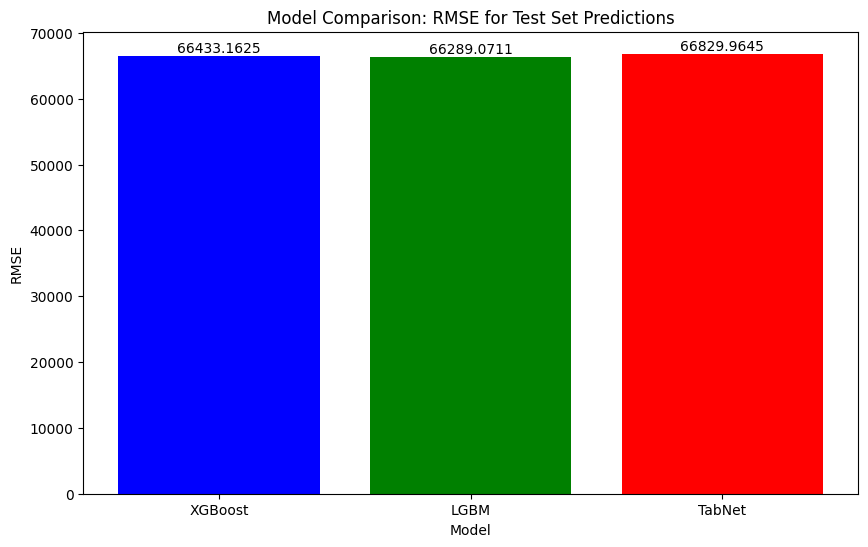

In [35]:
# Step 1: Get predictions from each model
xgb_pred = best_xgb_model.predict(X_test)
lgbm_pred = best_lgbm_model.predict(X_test)
tabnet_pred = tabnet.predict(X_test)

# Step 2: Create a DataFrame to store predictions
predictions_df = pd.DataFrame({
    'XGBoost': xgb_pred,
    'LGBM': lgbm_pred,
    'TabNet': tabnet_pred.reshape(-1)
})

# Step 3: Calculate RMSE for each model
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred))
tabnet_rmse = np.sqrt(mean_squared_error(y_test, tabnet_pred))

# Step 4: Create a DataFrame with RMSE values for each model
rmse_df = pd.DataFrame({
    'Model': ['XGBoost', 'LGBM', 'TabNet'],
    'RMSE': [xgb_rmse, lgbm_rmse, tabnet_rmse]
})

# Step 5: Plot a bar chart to compare the models' RMSE
plt.figure(figsize=(10, 6))


bars = plt.bar(rmse_df['Model'], rmse_df['RMSE'], color=['blue', 'green', 'red'])

# Step 6: Annotate each bar with the RMSE value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 4), ha='center', va='bottom', fontsize=10)


plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE for Test Set Predictions')
plt.show()

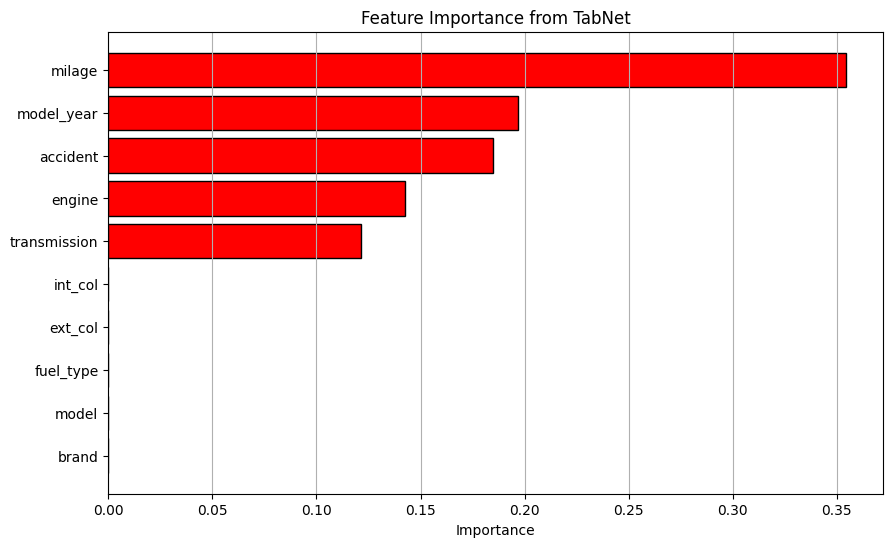

In [43]:
feature_importances = tabnet.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = np.array(feature_importances)[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(sorted_importances)), sorted_importances, align='center', color='red', edgecolor='black')
plt.yticks(np.arange(len(sorted_importances)), sorted_feature_names)
plt.xlabel("Importance")
plt.title("Feature Importance from TabNet")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(axis='x')
plt.show()

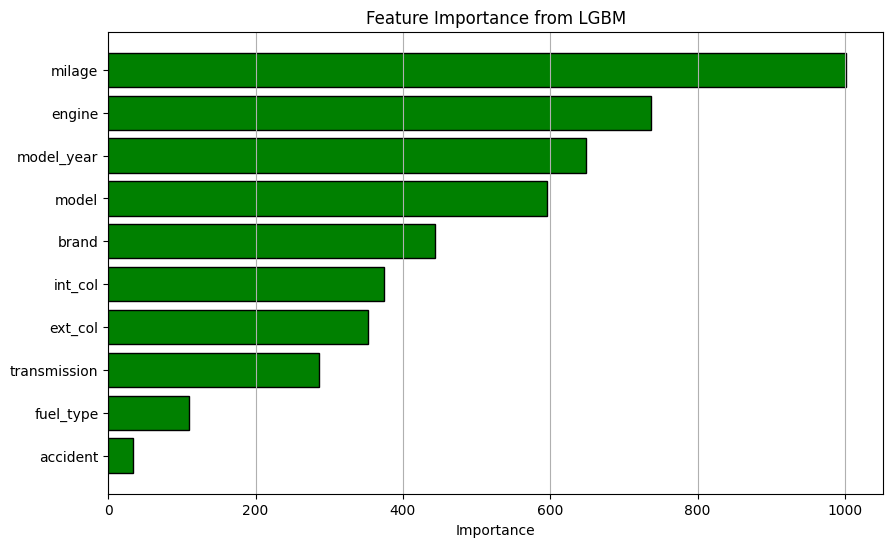

In [44]:
importances = best_lgbm_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = np.array(importances)[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(sorted_importances)), sorted_importances, align='center', color='green', edgecolor='black')
plt.yticks(np.arange(len(sorted_importances)), sorted_feature_names)
plt.xlabel("Importance")
plt.title("Feature Importance from LGBM")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(axis='x')
plt.show()

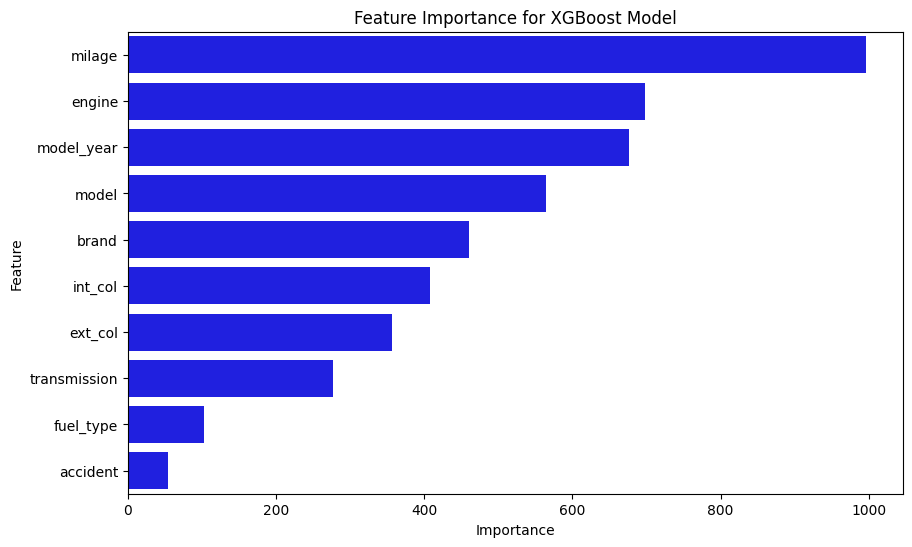

In [45]:
# Get the feature importance
importances = best_xgb_model.get_booster().get_score(importance_type='weight')  # You can also use 'gain' or 'cover'
features = list(importances.keys())  # Get feature names

# Create a DataFrame to visualize the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': [importances[feature] for feature in features]
})

# Sort the importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='blue')
plt.title('Feature Importance for XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 6: Deployment and Insights
# This final step focuses on presenting actionable insights and deploying the results.
# We will:
# - Summarize key findings, such as important features and model accuracy.
# - Make a submission prediction results
# Let's conclude by summarizing our results and discussing future work.


In [46]:
predicitons = best_lgbm_model.predict(test_scaled)

In [50]:
submission = pd.DataFrame({'id': test.id, 'price': predicitons})

In [52]:
submission.to_csv('submission.csv', index=False)

## After performing this project the following conclusions and results can be made:
## * The non-linear, tree-based models, especially the **Boosting** algorithms have demonstrated the best results.
## * Some columns became to be surpisingly meaningless, for example **accident** column wasn't inforamtive at all, and it might be an excellent choice to collect another data and change it or simply don't use it.
## * The result of approximately **63470** of RMSE score is significantly better than public average of **72500** according to Kaggle source
## * The TabNet neural network performed well and can be comparable to the best Boosting models


### This project was undertaken to showcase my proficiency in solving regression problems using a variety of advanced machine learning techniques. By employing multiple regression algorithms and optimizing model parameters, I aimed to achieve a robust and high-performing solution capable of delivering results comparable to industry standards and other practitioners in the field.

### The project highlights my ability to apply a diverse range of modeling techniques, including XGBoost, GradientBoosting, LightGBM, and TabNet, as well as my skills in model evaluation, hyperparameter tuning, and feature importance analysis. Through this work, I have demonstrated the ability to handle real-world datasets and develop solutions that are not only accurate but also interpretable.

### Additionally, this project serves as a significant addition to my professional portfolio, reflecting my ongoing commitment to enhancing my data science and machine learning expertise. The ability to solve complex regression problems, optimize models for performance, and present meaningful insights are crucial skills that I continue to hone and expand, contributing to my career development in the field of data science and machine learning.